In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os , glob
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.feature import local_binary_pattern as LBP
from skimage.feature import hog ,sift ,orb
from sklearn.svm import SVC ,SVR

In [2]:
def imshow(image , title = None):
    plt.imshow(image , 'gray')
    plt.title(title)
    plt.axis("off")
    plt.show()
    

def showGridImage (images , labels , GSize = 5 , title = None):
    selectedIndex = np.random.choice(len(images), GSize*GSize )
    fig , axes = plt.subplots(GSize , GSize, figsize = (10 , 10))
    for i , ax in enumerate(axes.ravel()):
        index = selectedIndex[i]
        image = images[index]
        label = labels[index]
        ax.imshow(image.reshape(100,100), 'gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f"{classes[label]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [3]:
mainPath = "./15Dec23/Image Classification/"
classes = os.listdir(mainPath)
images = []
labels = []

for cls in classes:
    folderPath = os.path.join(mainPath,cls)
    for imgname in os.listdir(folderPath):
        imagePath = os.path.join(folderPath , imgname) 
        img = cv2.imread(imagePath,0)
        img = cv2.resize(img , (100,100))
#         lbpFeatures.append(feature)
        images.append(img.flatten())
        
#         label.append(label)
        labels.append(classes.index(cls))


In [4]:
images = np.array(images)
labels = np.array(labels)

In [5]:
trainImages , testImages ,trainLabels , testLabels = train_test_split(images , labels ,test_size=0.2 ,random_state=0)

In [6]:
svmModel = SVC()

In [7]:
svmModel.fit(trainImages , trainLabels)

SVC()

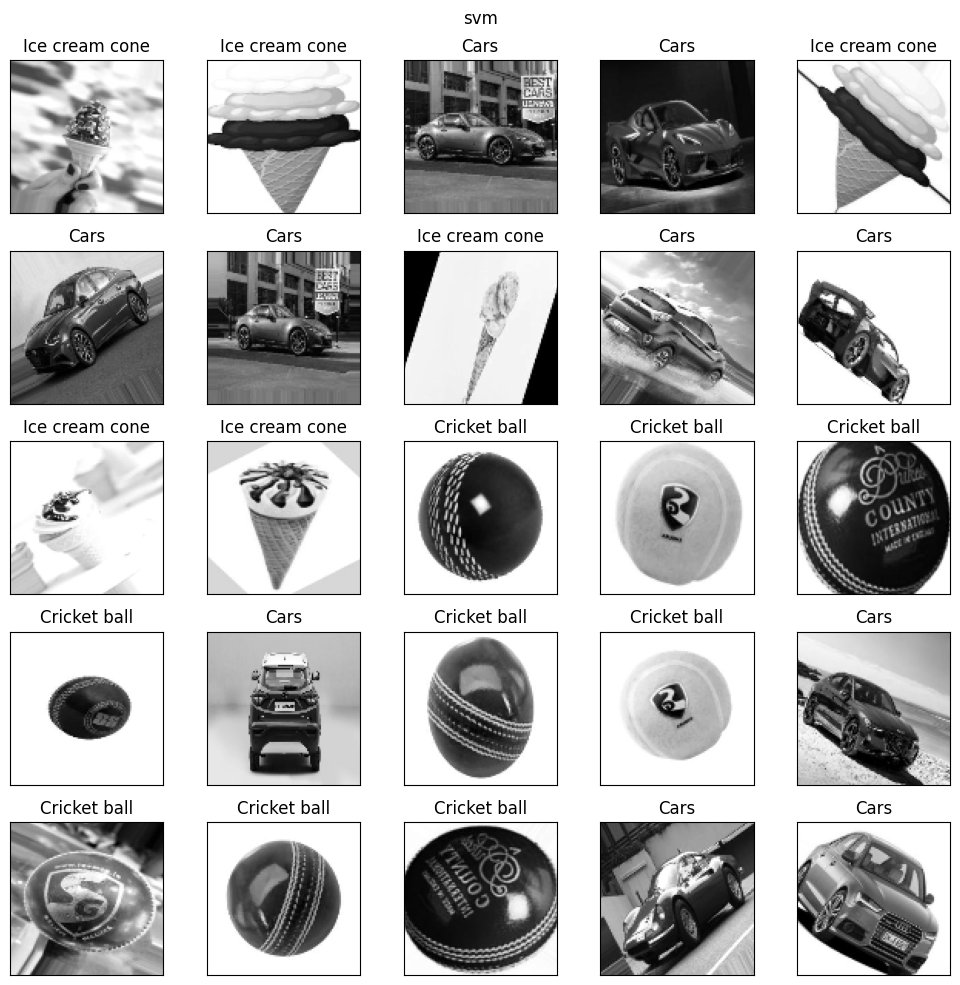

In [8]:
showGridImage(images , labels ,5,"svm")

In [17]:
predictedTest = svmModel.predict(testImages)  #prediction for testing 

In [18]:
accuracy_score(testLabels ,predictedTest)

0.9545454545454546

In [19]:
predictedtrain = svmModel.predict(trainImages)# prediction for training 

In [21]:
accuracy_score(trainLabels ,predictedtrain)

0.9721166032953105

In [22]:
trainPredictedLabel = svmModel.predict(trainImages)

In [23]:
accuracy_score(trainLabels,trainPredictedLabel)

0.9721166032953105

In [24]:
# changing the random_state
trainImages , testImages ,trainLabels , testLabels = train_test_split(images , labels ,test_size=0.2 ,random_state=42)

In [25]:
svmModel = SVC()

In [26]:
svmModel.fit(trainImages , trainLabels)

SVC()

In [27]:
predictedLabels = svmModel.predict(testImages)

In [28]:
accuracy_score(testLabels, predictedLabels)

0.9292929292929293

In [29]:
trainPredictedLabels = svmModel.predict(trainImages)

In [30]:
accuracy_score(trainLabels,trainPredictedLabels)

0.973384030418251

In [31]:
import pickle 

In [32]:
with open("SVM.pkl", "wb") as new:
    pickle.dump(svmModel, new)